In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model = pd.read_pickle("results/climate_reeval_single_fullresults/s3/soln212/gfdl-esm2m_rcp45/modelso.pkl")

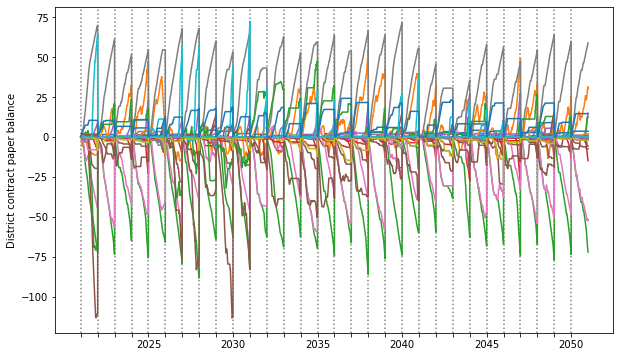

In [6]:
plt.figure(figsize=(10,6))

for district in model.district_list:
    supplies = district.daily_supplies_full
    for contract in model.contract_list:
        paper = supplies.get(f"{contract.name}_paper", None)
        if paper is not None:
            plt.plot(paper)

dowy0_idxs = []
for i,dowy in enumerate(model.dowy):
    if dowy == 0:
        dowy0_idxs.append(i)
        plt.axvline(i, color='0.5', ls=':', zorder=1)

plt.xticks(dowy0_idxs, [i if i%5 == 0 else '' for i in range(2021,2051)])
plt.ylabel("District contract paper balance")
plt.savefig(f'paper_balances.png', bbox_inches='tight', transparent=True, dpi=300)
